In [2]:
import os, glob, shutil
import mahotas as mh

In [3]:
DATAFOLDER = '/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/'

In [4]:
os.listdir(DATAFOLDER)

['Crack_images_final.npy',
 'Crack_masks_final.npy',
 'Lung_images_final.npy',
 'Crack_images.npy',
 'Crack_masks.npy',
 'Lung_masks_final.npy',
 'Crack_masks',
 '.DS_Store',
 'readme',
 'Crack_images']

In [5]:
# train_image_dir = os.path.join(DATAFOLDER, 'Train_In')
# test_image_dir = os.path.join(DATAFOLDER, 'Test_In')
# train_mask_dir =  os.path.join(DATAFOLDER, 'Train_Out')
# test_mask_dir = os.path.join(DATAFOLDER, 'Test_Out')
train_image_dir = os.path.join(DATAFOLDER, 'Crack_images')
#test_image_dir = os.path.join(DATAFOLDER, 'Test_In')
train_mask_dir =  os.path.join(DATAFOLDER, 'Crack_masks')
#test_mask_dir = os.path.join(DATAFOLDER, 'Test_Out')

In [7]:
# for i in os.listdir(train_mask_dir):
#     old_name = os.path.join(train_mask_dir, i)
#     print(old_name)
#     new_name = os.path.join(train_mask_dir, i.split('.')[0].zfill(4)+'.png')
#     print(new_name)
#     shutil.move(old_name, new_name)
# for i in os.listdir(test_mask_dir):
#     old_name = os.path.join(test_mask_dir, i)
#     print(old_name)
#     new_name = os.path.join(test_mask_dir, i.split('.')[0].zfill(4)+'.png')
#     print(new_name)
#     shutil.move(old_name, new_name)

In [6]:
all_image_files = sorted(sorted(glob.glob(train_image_dir+'/*.jpg')))
all_mask_files = sorted(sorted(glob.glob(train_mask_dir+'/*.jpg')))

In [7]:
print(all_image_files[0])

/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images/CFD_001.jpg


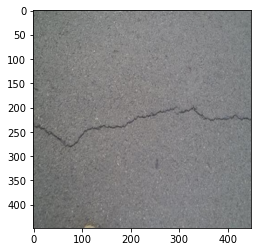

In [8]:
first_image = mh.imread(all_image_files[0])
imshow(first_image, cmap='gray')

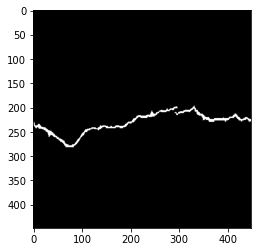

In [10]:
first_mask = mh.imread(all_mask_files[0])
imshow(first_mask, cmap='gray')

In [11]:
len(all_mask_files)

11298

In [12]:
first_mask.shape

(448, 448)

In [13]:
images = np.zeros((11298, 512, 512), dtype=np.uint8)

/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images/CFD_001.jpg
(448, 448, 3)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images/CFD_002.jpg
(448, 448, 3)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images/CFD_003.jpg
(448, 448, 3)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images/CFD_004.jpg
(448, 448, 3)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images/CFD_005.jpg
(448, 448, 3)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images/CFD_006.jpg
(448, 448, 3)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images/CFD_007.jpg
(448, 448, 3)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images/CFD_008.jpg
(448, 448, 3)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati0

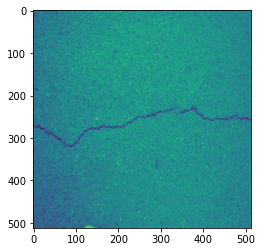

In [14]:
import numpy as np
import skimage.io as mh
import skimage.transform as skt

n_images = 11298  # number of images to load

# create array to hold the images
images = np.zeros((n_images, 512, 512), dtype=np.float32)

for i, a in enumerate(all_image_files[:n_images]):
    print(a)
    img = mh.imread(a)
    print(img.shape)

    if img.ndim == 3:
        # grab left image
        left = img[0:512,0:512,0]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        print(left_resized.shape)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.float32)
            left_resized /= 255.0  # normalize pixel values to [0, 1]
            if i < len(images):
                images[i] = left_resized

        # grab right image
        right = img[0:512,512:,0]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            print(right_resized.shape)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.float32)
                right_resized /= 255.0  # normalize pixel values to [0, 1]
                if i < len(images):
                    images[i] = right_resized

    elif img.ndim == 2:
        left = img[0:512,0:512]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        print(left_resized.shape)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.float32)
            left_resized /= 255.0  # normalize pixel values to [0, 1]
            if i < len(images):
                images[i] = left_resized

        right = img[0:512,512:]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            print(right_resized.shape)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.float32)
                right_resized /= 255.0  # normalize pixel values to [0, 1]
                if i < len(images):
                    images[i] = right_resized

print(len(images))
imshow(images[0])


/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks/CFD_001.jpg


/tmp/ipykernel_603137/565038912.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  masks = np.zeros((n_images, 512, 512), dtype=np.bool)
/tmp/ipykernel_603137/565038912.py:39: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  left_resized = left_resized.astype(np.bool)


(448, 448)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks/CFD_002.jpg
(448, 448)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks/CFD_003.jpg
(448, 448)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks/CFD_004.jpg
(448, 448)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks/CFD_005.jpg
(448, 448)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks/CFD_006.jpg
(448, 448)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks/CFD_007.jpg
(448, 448)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks/CFD_008.jpg
(448, 448)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks/CFD_009.jpg
(448, 448)
(512, 512)
/hpcstor6/scratch01/p/poornendu.pabbati001/crack_s

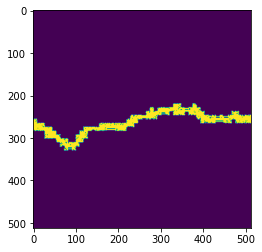

In [15]:
import numpy as np
import mahotas as mh
import skimage.transform as skt
import matplotlib.pyplot as plt

n_images = 11298
masks = np.zeros((n_images, 512, 512), dtype=np.bool)

for i, a in enumerate(all_mask_files):
    print(a)
    img = mh.imread(a)
    print(img.shape)
    
    if img.ndim == 3:
        # grab left image
        left = img[0:512,0:512,0]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        print(left_resized.shape)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.bool)
            if i < len(masks):
                masks[i] = left_resized

        # grab right image
        right = img[0:512,512:,0]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            print(right_resized.shape)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.bool)
                if i < len(masks):
                    masks[i] = right_resized
                
    elif img.ndim == 2:
        left = img[0:512,0:512]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        print(left_resized.shape)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.bool)
            if i < len(masks):
                masks[i] = left_resized

        right = img[0:512,512:]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            print(right_resized.shape)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.bool)
                if i < len(masks):
                    masks[i] = right_resized

print(len(masks))
plt.imshow(masks[0])
plt.show()


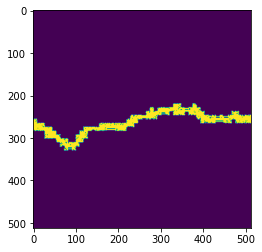

In [16]:
imshow(masks[0])


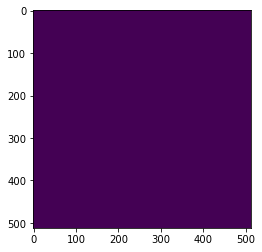

In [19]:
imshow(masks[-1])


In [20]:
images2 = np.expand_dims(images, axis=-1)

In [21]:
images2.shape

(11298, 512, 512, 1)

In [22]:
masks2 = np.expand_dims(masks, axis=-1)

In [23]:
masks2.shape

(11298, 512, 512, 1)

In [24]:
np.save('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy', images2)

In [25]:
np.save('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy', masks2)